In [1]:
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7b79bbfa95d0>)

In [4]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
smoker_df = medical_df[medical_df.smoker == 'yes']

In [8]:
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

4662.3128354612945

adding bmi didn't make an effect because they arr not so correlated

In [10]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [11]:
fig = px.scatter(non_smoker_df, x = 'bmi', y = 'charges', title="BMI vs Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [12]:
model.coef_ , model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Children with charges


In [13]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [14]:
fig = px.strip(non_smoker_df, x = "children", y = "charges", title = "Children vs Charges")
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

Non-smokers

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

4608.470405038247

Smokers

In [16]:
inputs, targets = smoker_df[['age','bmi','children']], smoker_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

5718.202480524154

Overall without smokers

In [17]:
inputs, targets = medical_df[['age','bmi','children']], medical_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

11355.317901125973

In [18]:
px.scatter(medical_df, x = "age", y = "charges", color = "smoker")

Some times we need to convert the columns into numeric values for there correlation. Here comes the categories:
1. Binary: if the column has two distinct values then we can convert them in 0's and 1's.
2. One-hot encoding: if the column has more than 2 categories, we can perform one-hot encoding and create a new column for each category 1's and 0's.
3. Ordinals: if the categories have natural orders(cold, hot, warm, neutral) we can convert them into numbers(1,2,3,4).

Binary Categories

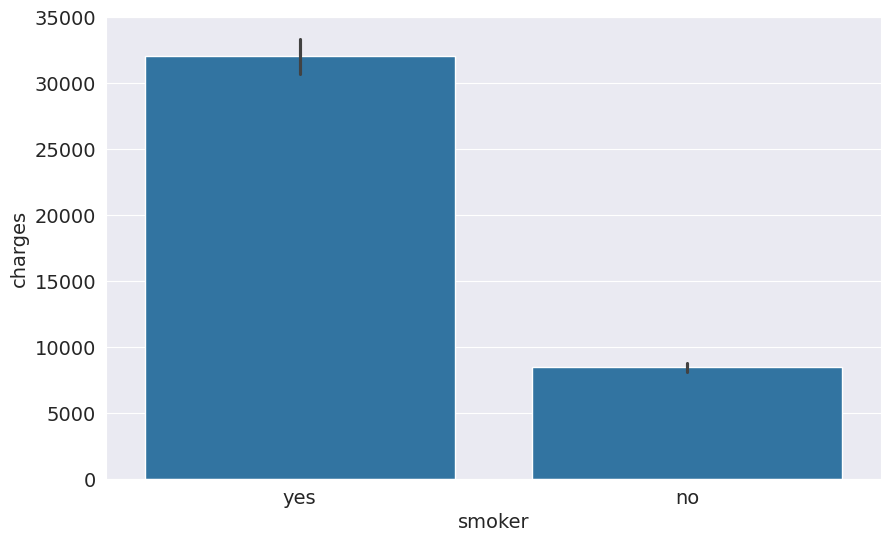

In [19]:
sns.barplot(data = medical_df, x = "smoker", y = "charges")
smoker_codes = {"no":0 , "yes":1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [20]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [21]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


After inclusion of smoker code

In [22]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

6056.439217188081

In [23]:
sex_codes = {"female":0,"male":1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [24]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [25]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


<Axes: xlabel='sex', ylabel='charges'>

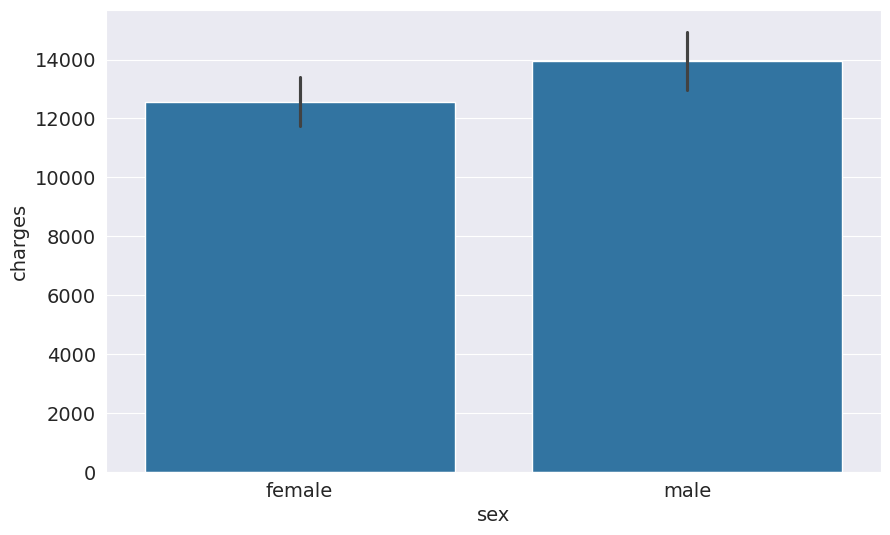

In [26]:
sns.barplot(data=medical_df, x = "sex", y="charges")

In [27]:
inputs, targets = medical_df[['age','bmi','children','smoker_code', 'sex_code']], medical_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

6056.100708754546

One Hot Encoding

<Axes: xlabel='region', ylabel='charges'>

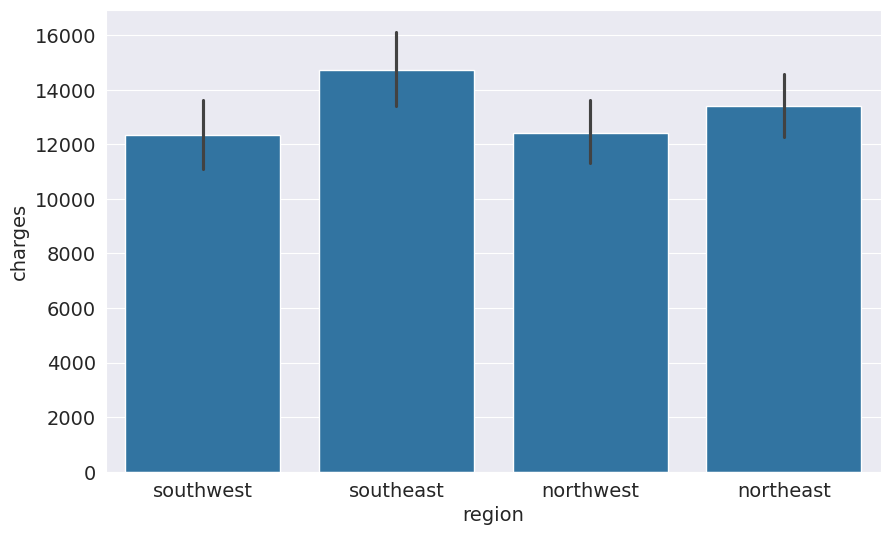

In [28]:
sns.barplot(data=medical_df,x="region", y="charges")

In [29]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [30]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [31]:
medical_df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [32]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [33]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [49]:
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']], medical_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

6041.6796511744515

For smokers only

In [35]:
one_hot = enc.transform(smoker_df[['region']]).toarray()
smoker_df[['northeast','northwest','southeast','southwest']] = one_hot
sex_codes = {"female":0,"male":1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes)
smoker_df

<ipython-input-35-c8a49edf670e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c8a49edf670e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c8a49edf670e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c8a49ed

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,0
11,62,female,26.290,0,yes,southeast,27808.72510,0.0,0.0,1.0,0.0,0
14,27,male,42.130,0,yes,southeast,39611.75770,0.0,0.0,1.0,0.0,1
19,30,male,35.300,0,yes,southwest,36837.46700,0.0,0.0,0.0,1.0,1
23,34,female,31.920,1,yes,northeast,37701.87680,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,0.0,0.0,0.0,1.0,0
1314,30,female,23.655,3,yes,northwest,18765.87545,0.0,1.0,0.0,0.0,0
1321,62,male,26.695,0,yes,northeast,28101.33305,1.0,0.0,0.0,0.0,1
1323,42,female,40.370,2,yes,southeast,43896.37630,0.0,0.0,1.0,0.0,0


In [36]:
input_col = ['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']
inputs, targets = smoker_df[input_col], smoker_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

5668.4678821121515

For non-smokers only

In [37]:
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
non_smoker_df[['northeast','northwest','southeast','southwest']] = one_hot
sex_codes = {"female":0,"male":1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes)
non_smoker_df

<ipython-input-37-56910e68bfca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-56910e68bfca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-56910e68bfca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-56910e6

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,sex_code
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,1
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,1
5,31,female,25.740,0,no,southeast,3756.62160,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.0,0.0,0.0,1.0,0
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0


In [38]:
input_col = ['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']
inputs, targets = non_smoker_df[input_col], non_smoker_df['charges']
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

4573.074988795492

In [45]:
input_col = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']

Feature Scaling

In [46]:
medical_df[input_col].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [50]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [51]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [52]:
model.intercept_

-12525.547811195444

In [54]:
import numpy as np
weights_df = pd.DataFrame({
    'feature': np.append(input_col, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


Standardization

In [55]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [57]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [58]:
numeric_col = ['age','bmi','children']
scalar.fit(medical_df[numeric_col])

StandardScaler()

In [60]:
scalar.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [61]:
scalar.var_

array([197.25385199,  37.16008997,   1.45212664])

In [63]:
medical_df[numeric_col]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [62]:
scaled_inputs = scalar.transform(medical_df[numeric_col])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

For categorical data

In [64]:
cat_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

In [65]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df.charges
model = LinearRegression()

model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = mean_squared_error(targets, predictions, squared = False)
loss

6041.6796511744515

In [66]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_col + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [67]:
new_customers = [[28, 30, 2, 1, 0, 0, 1, 0, 0]]

In [68]:
scalar.transform([[28, 30, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [69]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29875.81463371])

How to approach a Machine Learning Problem:
1. Explore the data and find correlations between inputs and targets
2. Pick the right models, loss functions and optimizers for the problem in hand
3. Scale numeric variables and one-hot encoding categorical data
4. Set aside a test set(using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

Creating a test set


In [70]:
from sklearn.model_selection import train_test_split

In [74]:
input_col = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs, targets = medical_df[input_col], medical_df['charges']

In [75]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.1)

In [76]:
model = LinearRegression()

model.fit(inputs_train, targets_train)
predictions_test = model.predict(inputs_test)
loss = mean_squared_error(targets_test, predictions_test, squared = False)
loss

5755.0189843636035

In [77]:
predictions_train = model.predict(inputs_train)
loss = mean_squared_error(targets_train, predictions_train, squared = False)
loss

6075.779409947468